# Business Goal

Zuber, a new ride-sharing company that's launching in Chicago, seeks to understand passenger preferences and the impact of external factors on rides. We will explore the data from competitors and test a hypothesis about the impact of weather on ride frequency.

### Initializing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
company = pd.read_csv('/project_sql_result_01.csv')
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
neighborhoods = pd.read_csv('/project_sql_result_04.csv')
neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Data Preprocessing<a class="anchor" id="section_1_1"></a>

In [4]:
# Reviewing general info on company info
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


The company data contains 64 rows and two columns: company_name and trips_amount. The company_name is a string object and trips_amount is an integer type. There are no missing values.
Let's check for duplicates.

In [5]:
# Checking for duplicates
company.duplicated(subset = None, keep = 'first')

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool

There are no duplicate rows in company data.

In [6]:
# Reviewing general info on company info
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The neighborhoods data contains 9 rows and two columns: dropoff_location_name and average_trips. The dropoff_location_name is a string object and average_trips is a float type. We will convert the average_trips to an integer. There are no missing values. Let's check for duplicates.

In [7]:
# Checking for duplicates
neighborhoods.duplicated(subset = None, keep = 'first')

0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Length: 94, dtype: bool

There are no duplicates in neighborhoods data.

In [8]:
# Converting average_trips into an integer type
neighborhoods['average_trips'] = neighborhoods['average_trips'].astype(int)
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


## Data Exploration <a class="anchor" id="chapter2"></a>
Let's explore the data. We need to identify the most successful taxi companies based on trip amounts and the most popular dropoff locations. 

### Taxi Company Trip Amounts   <a class="anchor" id="section_2_1"></a>
Let's compare trips amounts per taxi company.

In [9]:
#Identifying top 10 companies based on trip amounts
company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


The trips_amount for the 10th company was 5953 so let's slice the data for rows with trips_amount equaling or greater than this value to focus on these top ten. We will use this slice for data visualization.

In [10]:
# Filtering out the top 10 companies
top_companies=company.loc[company['trips_amount'] >= 5953]

top_companies.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


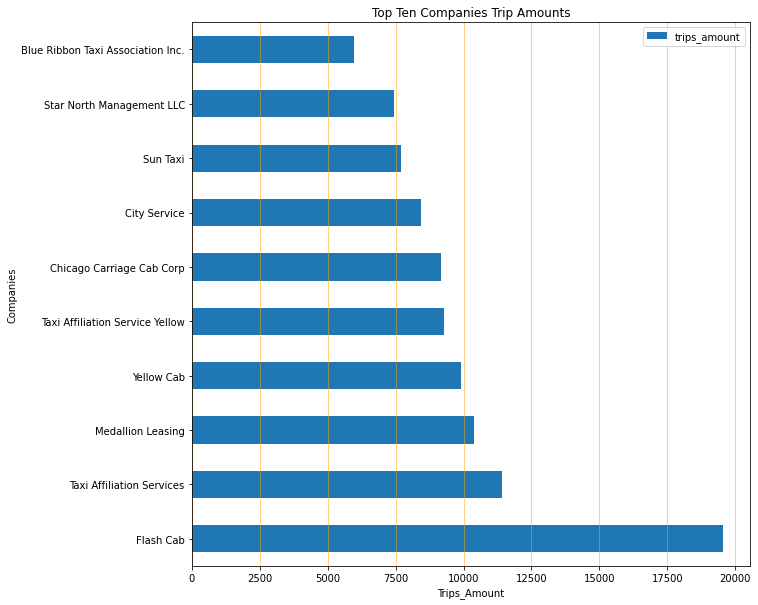

In [11]:
# Graphing the top 10 companies based on trip amounts.

top_companies.head(10).pivot_table(index= 'company_name', values='trips_amount').sort_values (by='trips_amount', ascending=False).plot(kind='barh', figsize=(10,10))

plt.xlabel('Trips_Amount')
plt.ylabel('Companies')
plt.title("Top Ten Companies Trip Amounts")
plt.grid(color='orange', linewidth=1, axis='x', alpha=0.5)
plt.show()

The top companies based on trip amounts were (highest to lowest): Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, and Blue Ribbon Taxi Association Inc..

Flash Cab had by far the most trips (19558), more than 8000 more trips than the 2nd ranked company, Taxi Affiliation Services.

### Top Dropoff Locations   <a class="anchor" id="section_2_1"></a>
Let's identify the top 10 neighborhood dropoff locations.

In [12]:
#Identifying top 10 neighborhood dropoff locations
neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


The average_trips for the 10th dropoff was 1259 so let's slice the data for all dropoffs equaling or greater than this value to focus on these top ten. We will use this slice for data visualization.

In [13]:
# Filtering out the top 10 dropoff locations
top_dropoffs=neighborhoods.loc[neighborhoods['average_trips'] >= 1259]
top_dropoffs.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


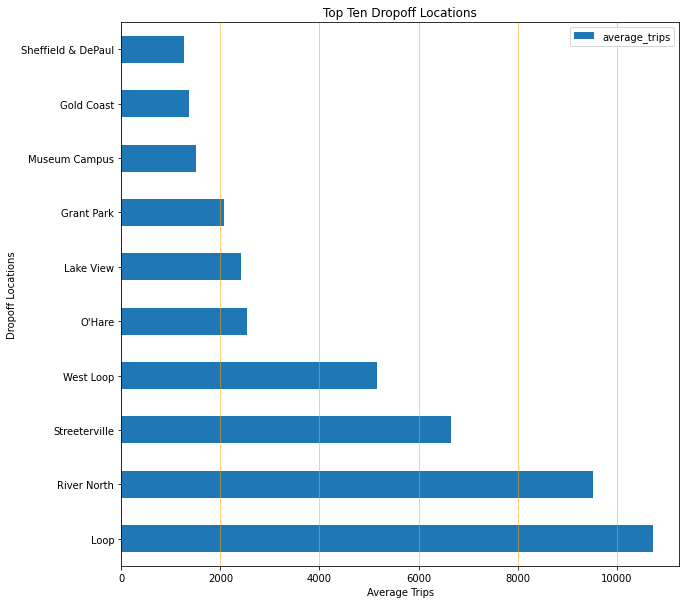

In [14]:
# Graphing the top 10 dropoff locations.

top_dropoffs.pivot_table(index= 'dropoff_location_name', values='average_trips').sort_values (by='average_trips', ascending=False).plot(kind='barh', figsize=(10,10))

plt.xlabel('Average Trips')
plt.ylabel('Dropoff Locations')
plt.title("Top Ten Dropoff Locations")
plt.grid(color='orange', linewidth=1, axis='x', alpha=0.5)
plt.show()

The top ten drop_off locations were (highest to lowest): Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul. Loop, River North, and Streeterville had over 6000 average trips.
Loop (10727 average trips) had around double the average trips of drop off locations ranked 4th or below: West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul. This indicated that Loop was by far the most popular dropoff location. Maybe those neighborhoods are in the the city center or they have some popular destinations.

## Testing Hypotheses <a class="anchor" id="chapter2"></a>

We need to evaluate how weather impacts taxi ride amounts.

We will need a dataframe with the information about weather conditions and taxi ride start times and durations. 

In [4]:
# importing Loop ride information

weather = pd.read_csv('project_sql_result_07.csv')
weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


### Data Preprocessing<a class="anchor" id="section_1_1"></a>

In [5]:
# Reviewing general info on company info
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [6]:
# Checking for duplicates
weather.duplicated(subset = None, keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
1063    False
1064    False
1065     True
1066     True
1067    False
Length: 1068, dtype: bool

We will test the following hypothesis:
 - Null Hypothesis: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
 - Alternate Hypothesis: The average duration of rides from the Loop to O'Hare International Airport does change on rainy Saturdays.
 
We will use a ttest_ind since there are two independent samples.
We will use an alpha level of 0.05.

In order to test our hypothesis about how weather correlates with average duration of taxi rides, we will need to filter the data into two groups based on weather conditions: good and bad.

In [16]:
# Filtering data 
 
bad_weather = weather.loc[weather['weather_conditions'] == 'Bad']
good_weather = weather.loc[weather['weather_conditions'] == 'Good']

In [17]:
# Creating a function to test hypothesis
 
def ttest(sample1, sample2):
 
    alpha = 0.05
    results = stats.ttest_ind(sample1, sample2)
 
    print('p-value: ', results.pvalue) 
 
    if results.pvalue < alpha:
        print('We reject the null hypothesis')
    else:
        print("We can't reject the null hypothesis")

In [18]:
# Testing the hypothesis
ttest(bad_weather['duration_seconds'], good_weather['duration_seconds'])

p-value:  6.517970327099473e-12
We reject the null hypothesis


The p-value is close to zero indicating that the chances of obtaining this result by chance are very small and our results are statistically significant. We reject the null hypothesis.
Our conclusion: The average duration of rides from the Loop to O'Hare International Airport does change on rainy Saturdays.

This result makes sense since more people would take taxis on a rainy day, which would result in traffic and therefore longer ride duration. In addition, bad weather might cause poor driving conditions which would cause taxi drivers to drive more slowly, resulting in longer ride duration.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great! Right alpha and test.
    
Yes, you are right. The average duration of rides of sunny and rainy days differs.
    
Very good that we check it by test. It give to us full picture.
</div>

## General Conclusion <a class="anchor" id="chapter2"></a>

Zuber, a new ride-sharing company that's launching in Chicago, seeks to understand passenger preferences and the impact of external factors on rides. We explored the data from competitors and test a hypothesis about the impact of weather on ride frequency. We used three dataframes for our analysis.

We identified the most successful taxi companies based on trip amounts and the most popular dropoff locations. 

Taxi Company Trip Amounts:
We compared trips amounts per taxi company and sliced out the top ten companies based on the greatest trip amounts. We graphed this data.

The top companies based on trip amounts were (highest to lowest): Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, and Blue Ribbon Taxi Association Inc..
Flash Cab had by far the most trips (19558), more than 8000 more trips than the 2nd ranked company, Taxi Affiliation Services.
 
Top Drop-off Locations:
We compared the average trips per dropoff location and sliced out the top ten dropoff locations with the greatest average trips. We graphed this data.

The top ten drop_off locations were (highest to lowest): Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul. Loop, River North, and Streeterville had over 6000 average trips.
Loop (10727 average trips) had around double the average trips of drop off locations ranked 4th or below: West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul. This indicated that Loop was by far the most popular dropoff location.

We tested the following hypothesis:
 - Null Hypothesis: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
 - Alternate Hypothesis: The average duration of rides from the Loop to O'Hare International Airport does change on rainy Saturdays.
 
We used a ttest_ind since there were two independent samples.
We used an alpha level of 0.05.

In order to test our hypothesis about how weather correlates with average duration of taxi rides, we filtered the data into two groups based on weather conditions: good and bad.

The p-value was close to zero indicating that the chances of obtaining this result by chance are very small and our results are statistically significant. We rejected the null hypothesis. 
Our conclusion: The average frequency of rides from the Loop to O'Hare International Airport does change on rainy Saturdays.

This result makes sense since more people would take taxis on a rainy day, which would result in traffic and therefore longer ride duration. In addition, bad weather might cause poor driving conditions which would cause taxi drivers to drive more slowly, resulting in longer ride duration.